CNN Implementation for Fashion MNIST

Importing libraries and modules

In [1]:
import tensorflow as tf
from sklearn.metrics import precision_score,recall_score,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Loading the MNIST Fashion dataset

In [2]:
mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Preprocessing the dataset

In [3]:
input_shape=(28,28,1)
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)

#feature scaling
X_train=X_train/255
X_test=X_test/255

Initialising parameters and Sequential model

In [4]:
batch_size=32
epochs=25
cnn=tf.keras.models.Sequential()

Adding input layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))

C:\Users\gobi2\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adding first convolutional layer, pooling layer and dropout layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

Adding second convolutional layer, pooling layer and dropout layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

Adding third convolutional layer, pooling layer and dropout layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

Flattening, adding fully connected layer and output layer

In [9]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) #fully connected layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax')) #output layer

Compiling the CNN model

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

Custom callback for CNN

In [12]:
class PrecisionRecallMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = cnn.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=1)
        precision = precision_score(y_test, y_pred_classes, average='macro')
        recall = recall_score(y_test, y_pred_classes, average='macro')
        precisions.append(precision)
        recalls.append(recall)

precisions = []
recalls = []

Training the model

In [14]:
history=cnn.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1,callbacks=[PrecisionRecallMetrics()])

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - acc: 0.6818 - loss: 0.8660 - val_acc: 0.8428 - val_loss: 0.4158
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - acc: 0.8466 - loss: 0.4128 - val_acc: 0.8793 - val_loss: 0.3214
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - acc: 0.8721 - loss: 0.3434 - val_acc: 0.8940 - val_loss: 0.2812
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - acc: 0.8834 - loss: 0.3155 - val_acc: 0.9003 - val_loss: 0.2576
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - acc: 0.8904 - loss: 0.2963 - val_acc: 0.9143 - val_loss: 0.2367
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - acc: 0.8974 - loss: 0.2756 - val_acc: 0.9100 - val_loss: 0.2389
Epoch 7/25
313/313 ━━━

Plotting Training Accuracy and Validation Accuracy

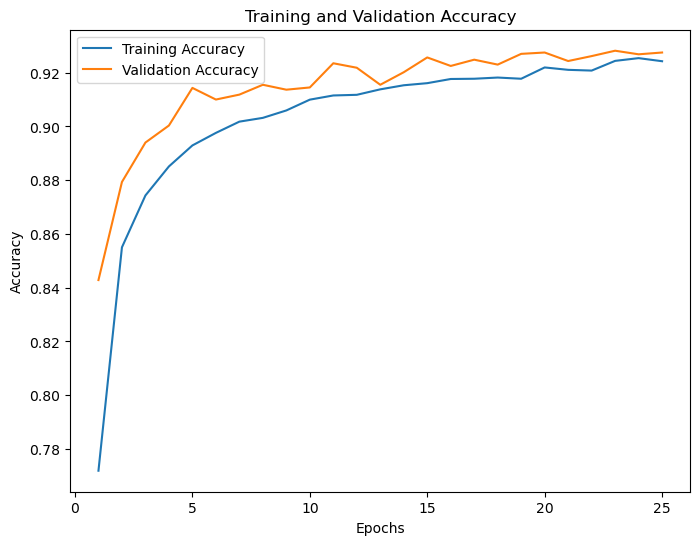

In [16]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs+1), accuracy, label='Training Accuracy')
plt.plot(range(1,epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting Training Loss and Validation Loss

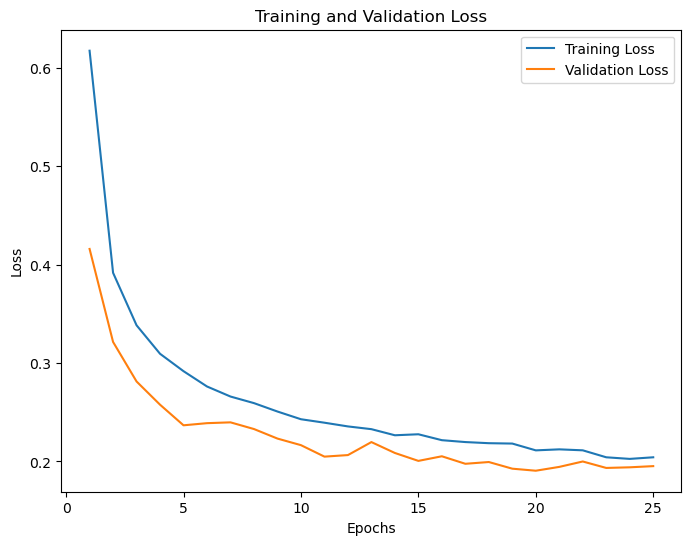

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs+1), train_loss, label='Training Loss')
plt.plot(range(1,epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Graphical representation of Test Accuracy and Test Loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9243 - loss: 0.2103


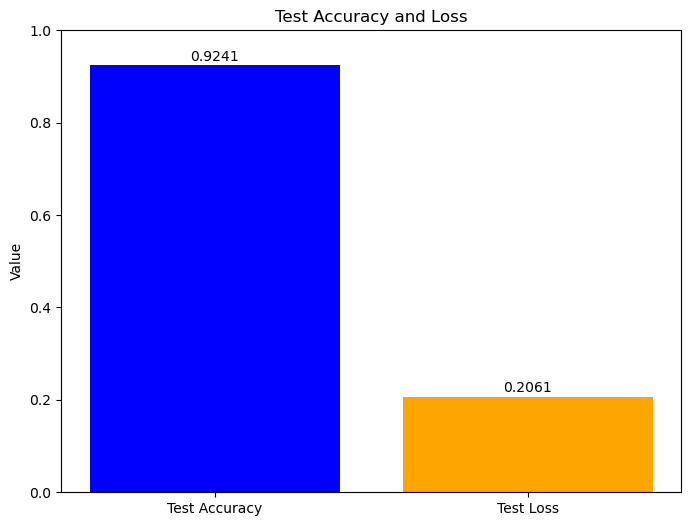

In [18]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
metrics = ['Test Accuracy', 'Test Loss']
values = [test_accuracy, test_loss]
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'])
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center')
plt.title('Test Accuracy and Loss')
plt.ylabel('Value')
plt.ylim(0, 1)  
plt.show()


Plotting Precision and Recall Curves

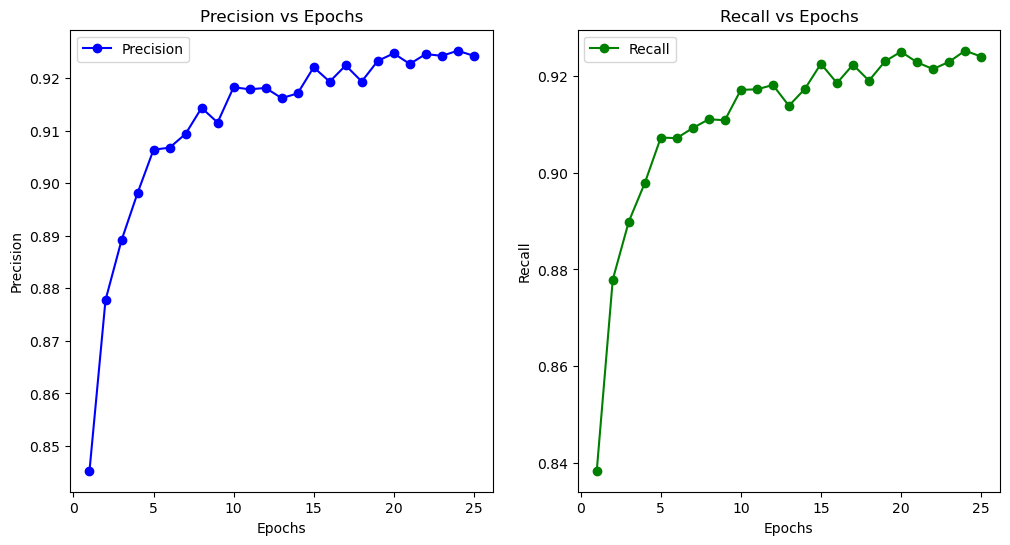

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), precisions, label='Precision', marker='o', color='blue')
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot the Recall
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), recalls, label='Recall', marker='o', color='green')
plt.title('Recall vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.show()

Creating Confusion Matrix

In [21]:
y_pred = cnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  
cm = confusion_matrix(y_test, y_pred_classes)  
print("Confusion Matrix:")
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion Matrix:
[[874   1  14  14   1   0  93   0   3   0]
 [  1 983   0  12   1   0   1   0   2   0]
 [ 12   1 909   6  34   0  38   0   0   0]
 [ 14   3   8 919  34   0  21   0   1   0]
 [  1   0  40  13 894   0  51   0   1   0]
 [  0   0   0   0   0 987   0   8   0   5]
 [ 97   2  51  25  63   0 759   0   3   0]
 [  0   0   0   0   0   7   0 987   0   6]
 [  3   0   2   0   1   1   7   1 985   0]
 [  0   0   0   0   0   5   1  50   0 944]]
